In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec

In [47]:
df = pd.read_csv('concated_edgi.csv')

In [48]:
df['E-Government Index'] = df['E-Government Index'].apply(lambda x: x * 100.0)
df['E-Participation Index'] = df['E-Participation Index'].apply(lambda x: x * 100.0)
df['Online Service Index'] = df['Online Service Index'].apply(lambda x: x * 100.0)
df['Human Capital Index'] = df['Human Capital Index'].apply(lambda x: x * 100.0)
df['Telecommunication Infrastructure Index'] = df['Telecommunication Infrastructure Index'].apply(lambda x: x * 100.0)

In [49]:
df = df.drop(columns=['Unnamed: 0'])

In [50]:
df.head(10)

,Survey Year,Country Name,E-Government Rank,E-Government Index,E-Participation Index,Online Service Index,Human Capital Index,Telecommunication Infrastructure Index
0,2003,Brazil,41,52.673,37.930,57.641,83.000,17.378
1,2004,Brazil,35,56.746,24.590,63.706,90.000,16.533
2,2005,Brazil,33,59.811,49.206,75.000,88.000,16.435
3,2008,Brazil,45,56.790,45.454,60.200,88.250,21.812
4,2010,Brazil,61,50.058,28.571,36.825,88.370,25.380
5,2012,Brazil,59,61.673,50.000,67.320,82.025,35.676
6,2014,Brazil,57,60.082,70.588,59.842,73.720,46.681
7,2016,Brazil,51,63.769,72.881,73.188,67.867,50.250
8,2018,Brazil,44,73.270,97.190,92.360,75.250,52.200
9,2020,Brazil,54,76.770,90.480,87.060,78.030,65.220


In [51]:
df_tidy = df.melt(
    id_vars='Survey Year',
    value_vars=[
        'E-Government Index', 
        'E-Participation Index', 
        'Online Service Index', 
        'Human Capital Index', 
        'Telecommunication Infrastructure Index'
    ],
    var_name='Index Type',
    value_name='Percentage'
)

In [52]:
df_tidy['Index Type'].unique()

array(['E-Government Index', 'E-Participation Index',
       'Online Service Index', 'Human Capital Index',
       'Telecommunication Infrastructure Index'], dtype=object)

In [53]:
df_egov = df_tidy.loc[df_tidy['Index Type'] == "E-Government Index"]
df_epart = df_tidy.loc[df_tidy['Index Type'] == "E-Participation Index"]
df_services = df_tidy.loc[df_tidy['Index Type'] == "Online Service Index"]
df_humancap = df_tidy.loc[df_tidy['Index Type'] == "Human Capital Index"]
df_telecom = df_tidy.loc[df_tidy['Index Type'] == "Telecommunication Infrastructure Index"]

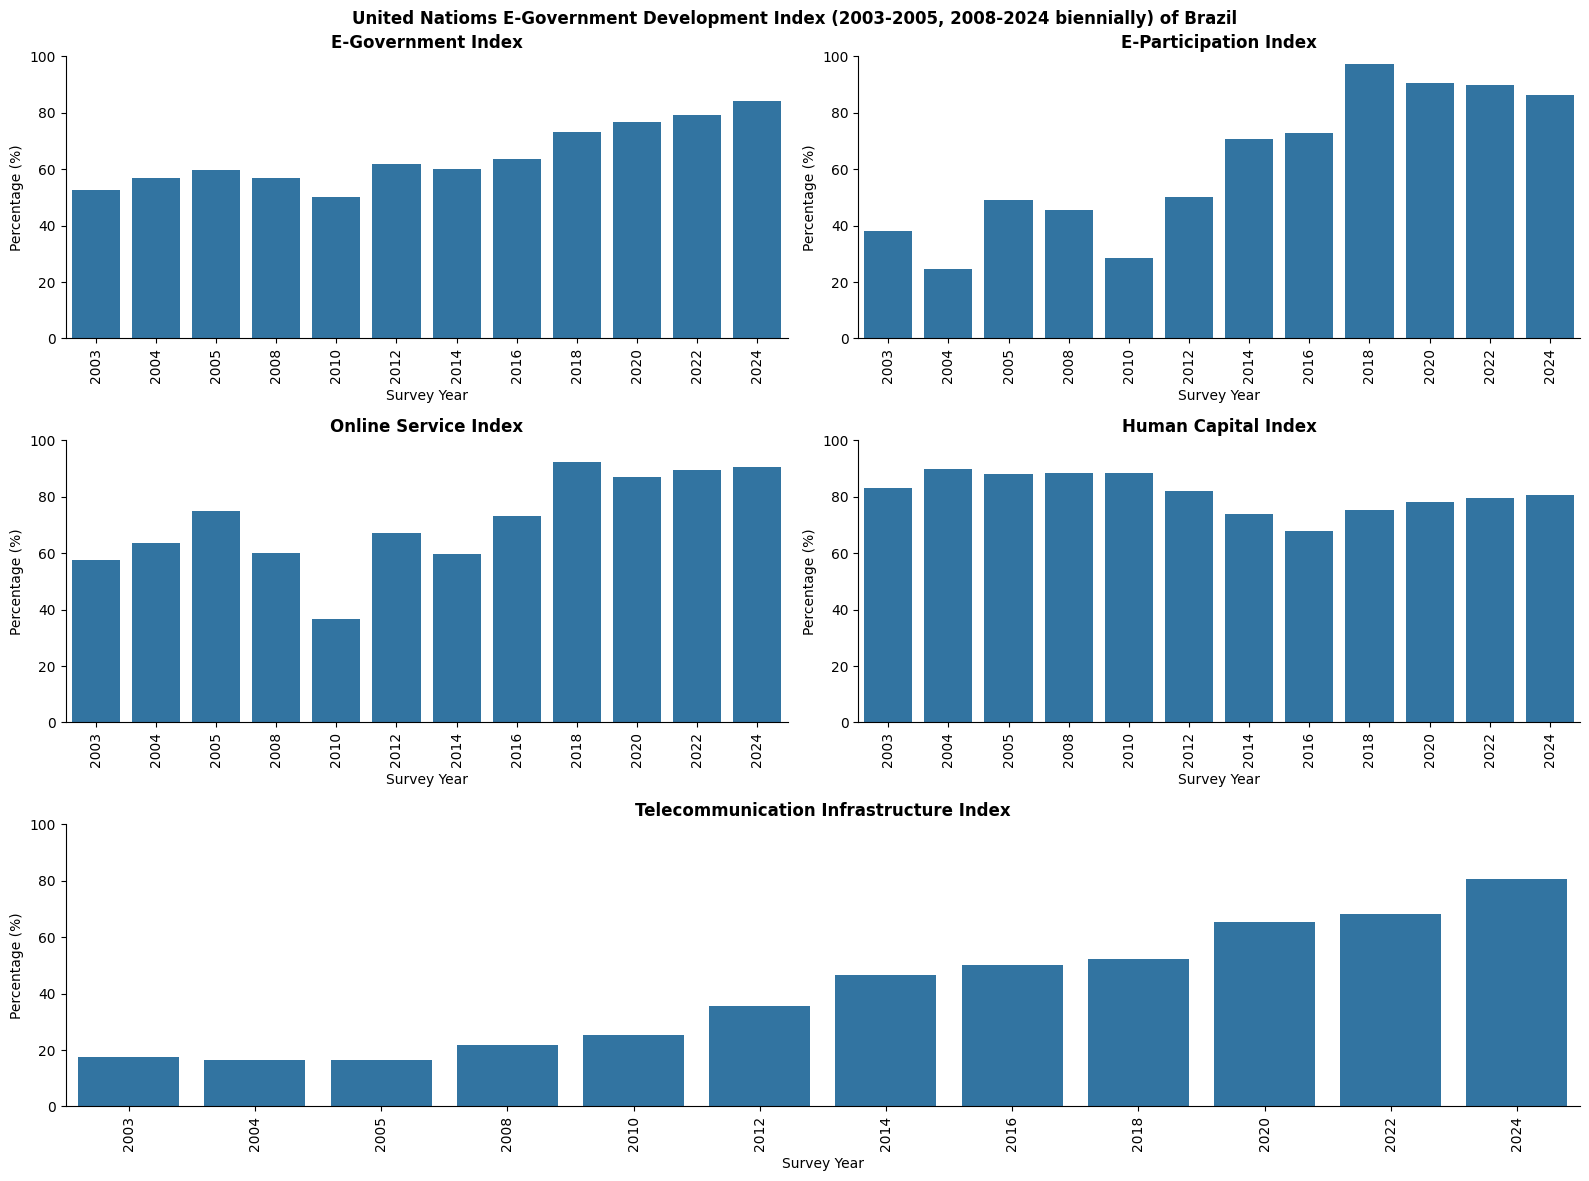

In [54]:
fig = plt.figure(figsize=(16, 12)) # Adjust figure size as needed

gs = GridSpec(3, 2, figure=fig)

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1]) 
ax2 = fig.add_subplot(gs[1, 0]) 
ax3 = fig.add_subplot(gs[1, 1]) 
ax4 = fig.add_subplot(gs[2, :]) 

all_axes = [ax0, ax1, ax2, ax3, ax4]

sns.barplot(data=df_egov, y='Percentage', x='Survey Year', orient='v', ax=ax0)
sns.barplot(data=df_epart, y='Percentage', x='Survey Year', orient='v', ax=ax1)
sns.barplot(data=df_services, y='Percentage', x='Survey Year', orient='v', ax=ax2)
sns.barplot(data=df_humancap, y='Percentage', x='Survey Year', orient='v', ax=ax3)
sns.barplot(data=df_telecom, y='Percentage', x='Survey Year', orient='v', ax=ax4)

ax0.set_title('E-Government Index', fontweight='bold')
ax1.set_title('E-Participation Index', fontweight='bold')
ax2.set_title('Online Service Index', fontweight='bold')
ax3.set_title('Human Capital Index', fontweight='bold')
ax4.set_title('Telecommunication Infrastructure Index', fontweight='bold') # Title for the spanned plot

for subplot_ax in all_axes:
    subplot_ax.set_ylim(0, 100) 
    subplot_ax.tick_params(axis='x', rotation=90) 
    subplot_ax.set_ylabel('Percentage (%)')
    subplot_ax.set_xlabel('Survey Year')

plt.suptitle('United Natioms E-Government Development Index (2003-2005, 2008-2024 biennially) of Brazil', fontweight='bold')
sns.despine()
plt.tight_layout() 
plt.show()